# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv('../clustering_data.csv')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.set_index('Area Code')
df = df.astype(float)

code_cols = [col for col in df if col.startswith('Code')]
df.drop(columns=code_cols, inplace=True)

region_cols = [col for col in df if col.startswith('region')]
df.drop(columns=region_cols, inplace=True)

df

,Year,mean_happiness,suicide_rates,crimes,population,population_density,unemployment,mean_income_support,n_is_claimants,house_sales,...,Medium Town,Small Town,Village or smaller,gardens_perc,income_support_rate,house_sales_pp,bankruptcy_pp,no_rainy_days,inflation,previous_period_happiness_change
Area Code,,,,,,,,,,,,,,,,,,,,,
E06000047,0.0,-0.06,-20.0,-7.740239,1267.0,0.569212,1.200000,-3.51,NaN,163.0,...,34.313780,23.018598,42.603846,0.941,NaN,0.128650,-0.068666,15.7,-1.282878,NaN
E06000005,0.0,-0.12,-3.0,-12.366512,-81.0,-0.410177,0.801266,-3.00,-732.0,90.0,...,0.000000,0.000000,12.545671,0.948,9.037037,-1.111111,0.123457,15.7,-1.282878,NaN
E06000001,0.0,-0.12,0.0,-7.812996,173.0,1.846072,-0.749596,-3.41,-1012.0,70.0,...,0.000000,0.000000,3.457341,0.941,-5.849711,0.404624,-0.040462,15.7,-1.282878,NaN
E06000002,0.0,0.13,-1.0,-10.816688,358.0,6.644198,-0.083803,-3.57,-1699.0,174.0,...,0.000000,0.000000,0.747874,0.946,-4.745810,0.486034,-0.067039,15.7,-1.282878,NaN
E06000057,0.0,0.20,1.0,-2.727673,211.0,0.042033,-0.200000,-2.76,-1445.0,-125.0,...,29.406776,32.126379,38.466845,0.928,-6.848341,-0.592417,-0.208531,15.7,-1.282878,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N09000006,8.0,-0.02,NaN,NaN,-60.0,-0.020949,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.23
N09000007,8.0,0.03,NaN,NaN,450.0,0.889705,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.38
N09000008,8.0,-0.19,NaN,NaN,169.0,0.159552,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.21


# Removing outliers

In [7]:
q_low = df.quantile(0.0005)
q_hi  = df.quantile(0.9995)

df_no_outs = df.where(((df < q_hi) & (df > q_low)), np.nan)

df_no_outs.columns = [col + '_no_outliers' for col in df_no_outs.columns]
df_no_outs.drop(['mean_happiness_no_outliers', 'mean_happiness_binary_no_outliers', 'mean_happiness_3clusters_no_outliers'], inplace=True, axis=1)

#combined_df = pd.merge(df['mean_happiness_binary'], df_no_outs, left_index=True, right_index=True)
combined_df = pd.concat([df, df_no_outs], axis=1)
combined_df.drop(['mean_happiness', 'mean_happiness_3clusters'], inplace=True, axis=1)
combined_df.to_csv('../clustering_data_with_noout_cols.csv')


In [8]:
combined_df.columns

Index(['Year', 'suicide_rates', 'crimes', 'population', 'population_density',
       'unemployment', 'mean_income_support', 'n_is_claimants', 'house_sales',
       'bankruptcy', 'processing', 'productivity', 'road_casualties', 'ofsted',
       'infant_mortality', 'childhood_tooth_decay', 'gp_access',
       'dental_access', 'mean_happiness_binary', 'Core City', 'Other City',
       'Large Town', 'Medium Town', 'Small Town', 'Village or smaller',
       'gardens_perc', 'income_support_rate', 'house_sales_pp',
       'bankruptcy_pp', 'no_rainy_days', 'inflation',
       'previous_period_happiness_change', 'Year_no_outliers',
       'suicide_rates_no_outliers', 'crimes_no_outliers',
       'population_no_outliers', 'population_density_no_outliers',
       'unemployment_no_outliers', 'mean_income_support_no_outliers',
       'n_is_claimants_no_outliers', 'house_sales_no_outliers',
       'bankruptcy_no_outliers', 'processing_no_outliers',
       'productivity_no_outliers', 'road_casualties

# Visualisations

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


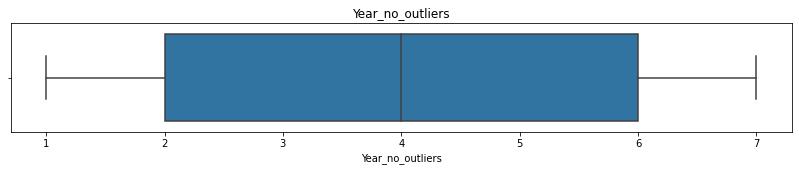

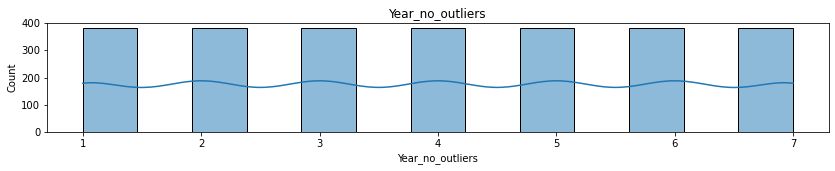

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


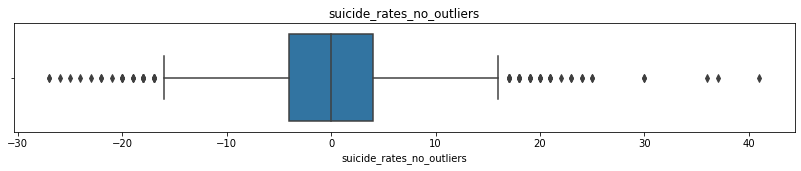

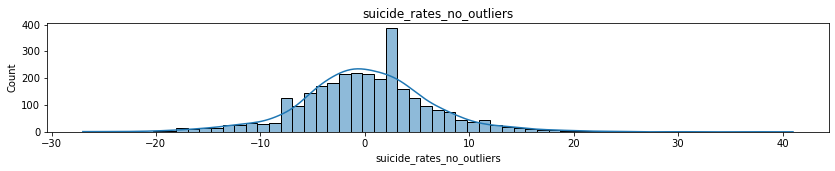

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


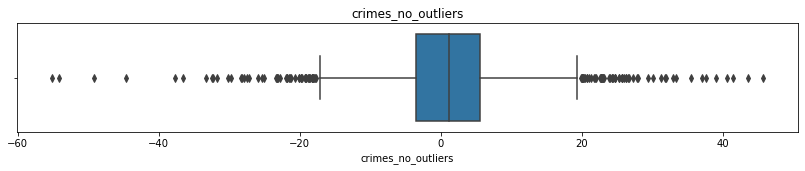

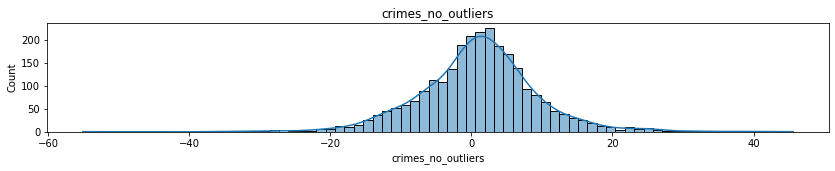

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


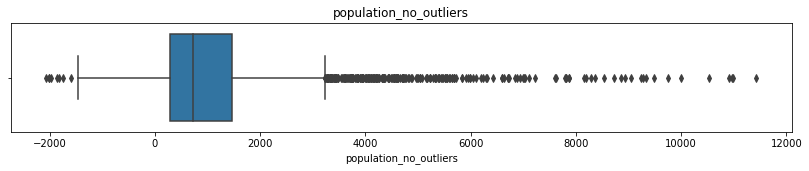

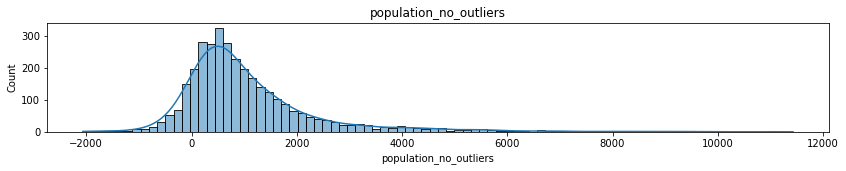

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


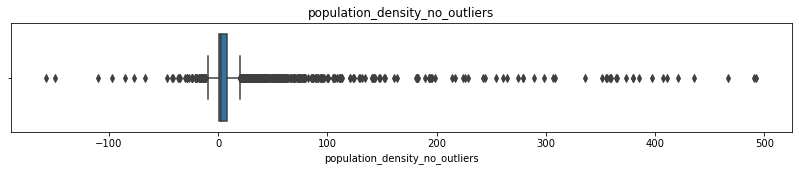

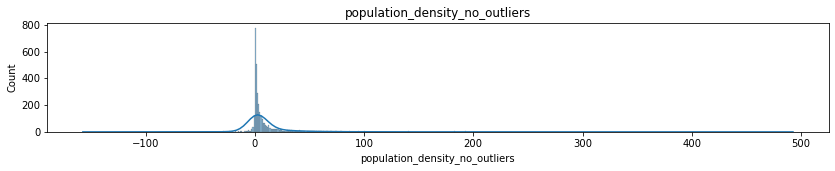

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


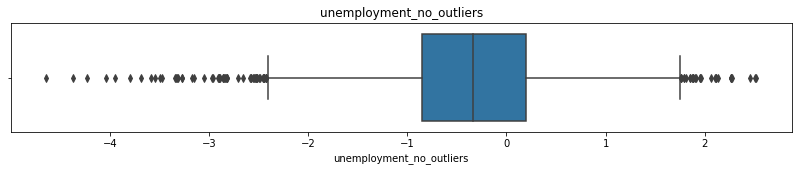

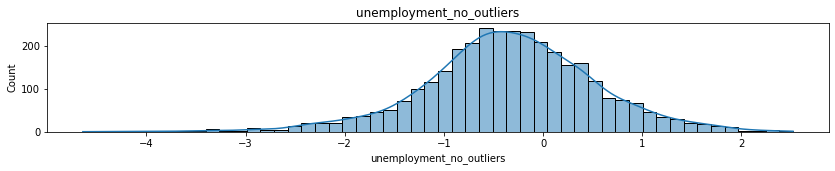

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


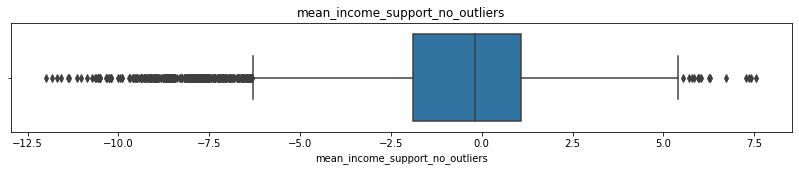

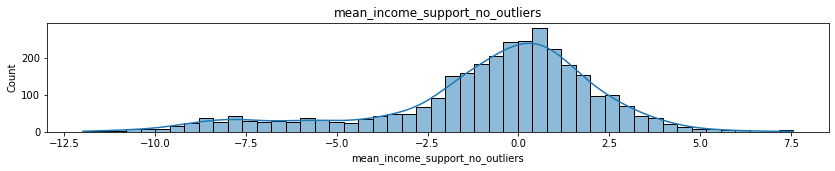

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


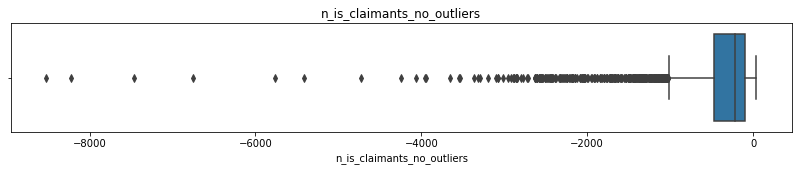

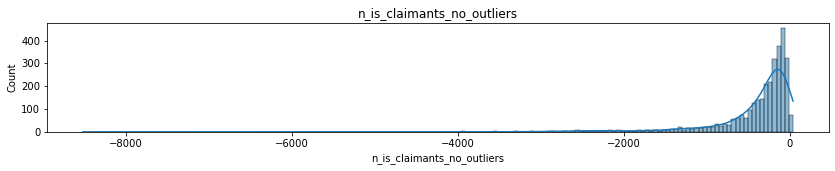

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


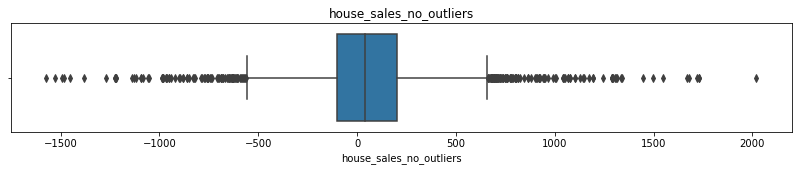

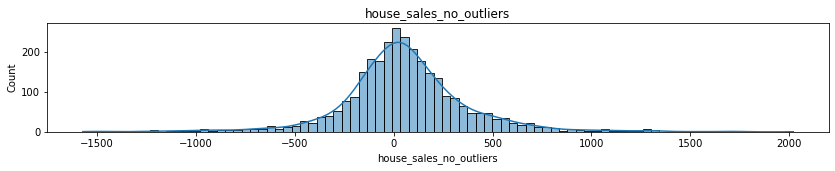

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


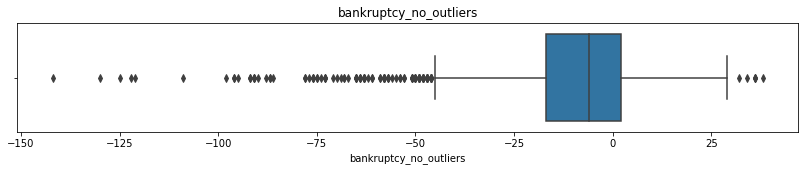

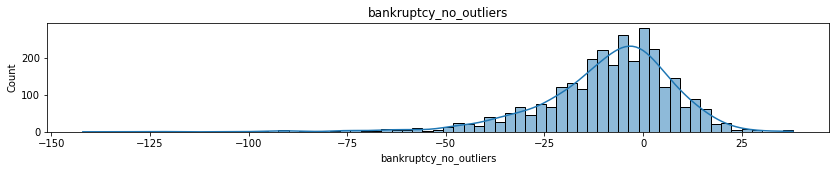

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


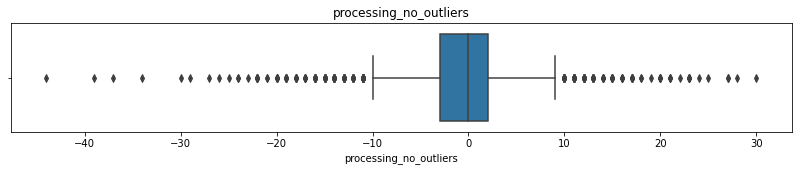

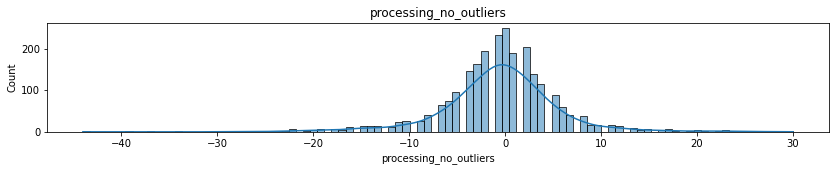

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


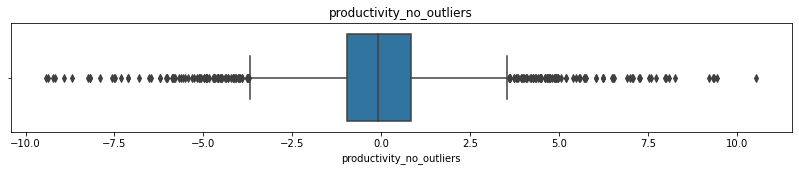

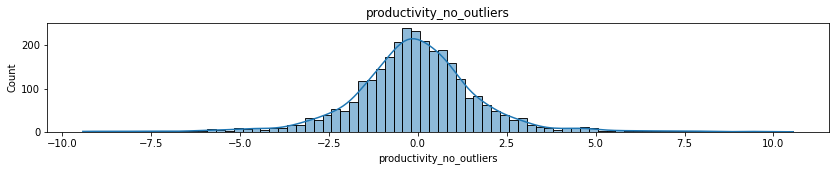

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


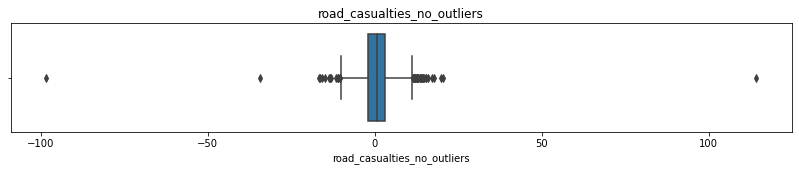

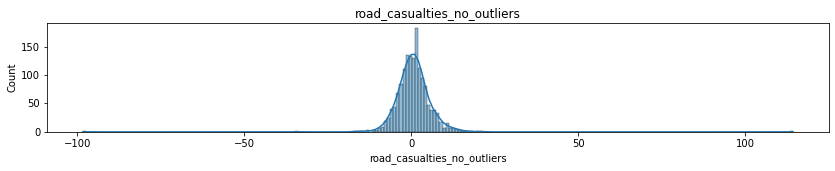

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


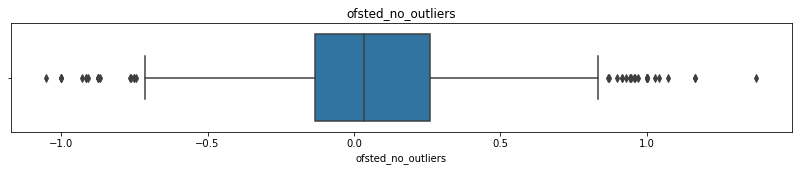

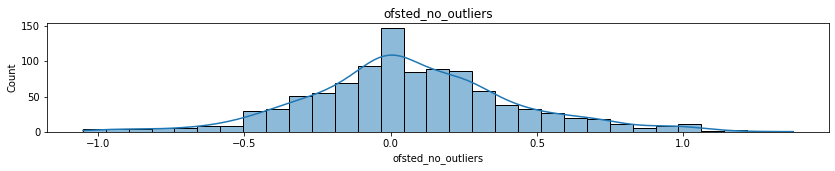

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


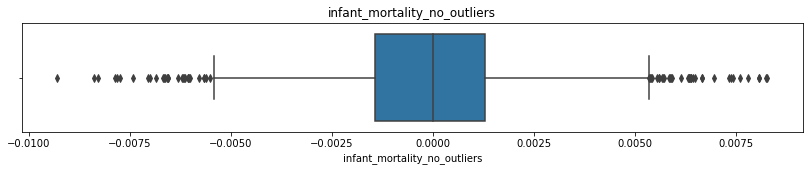

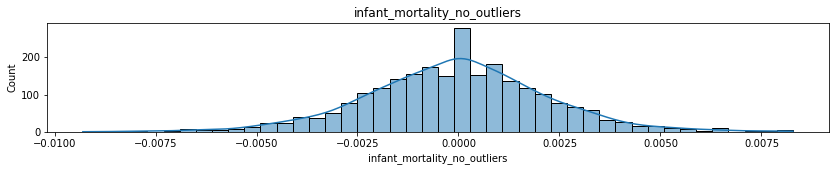

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


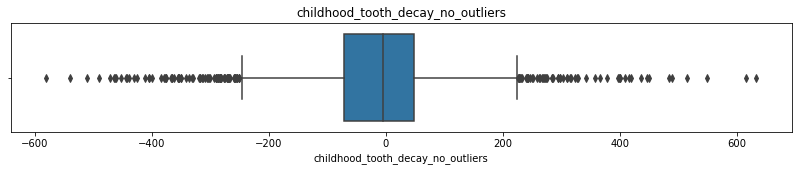

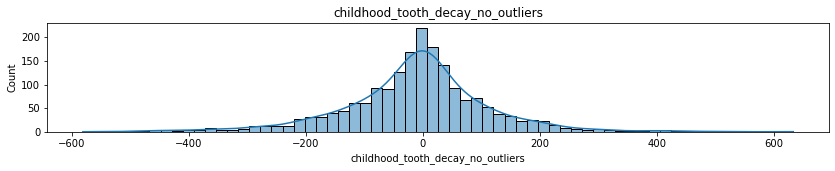

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


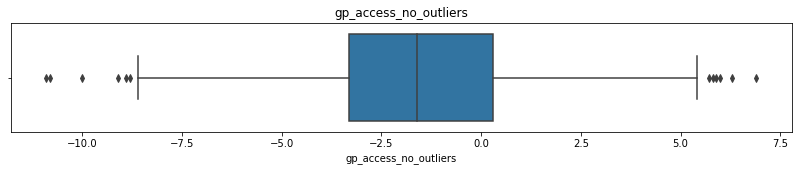

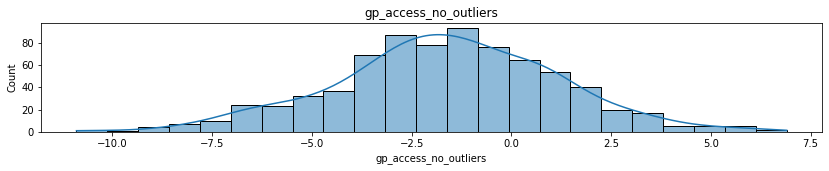

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


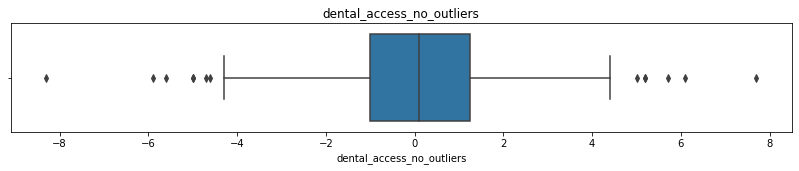

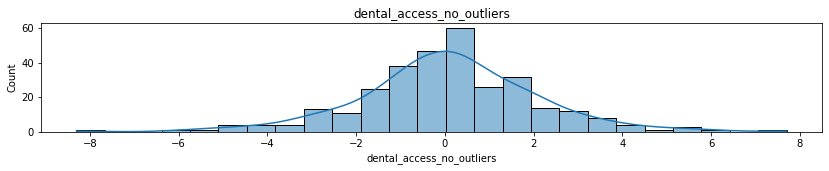

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


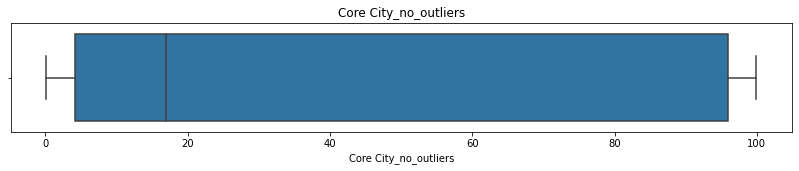

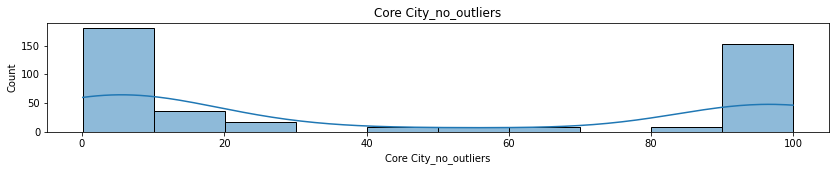

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


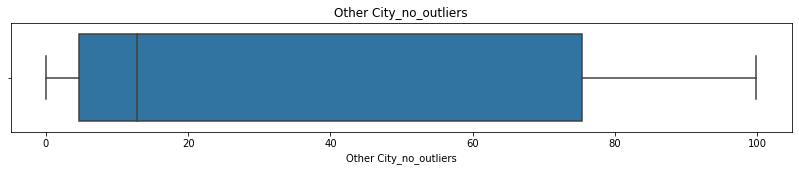

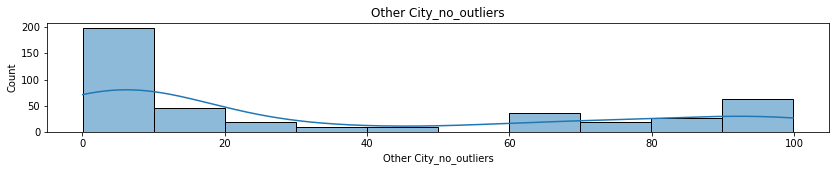

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


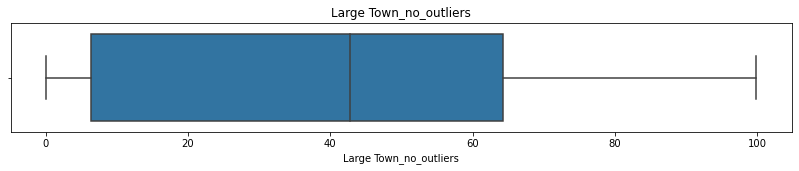

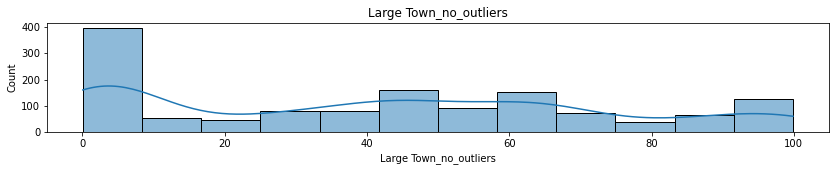

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


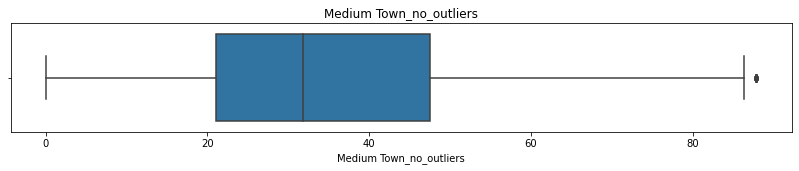

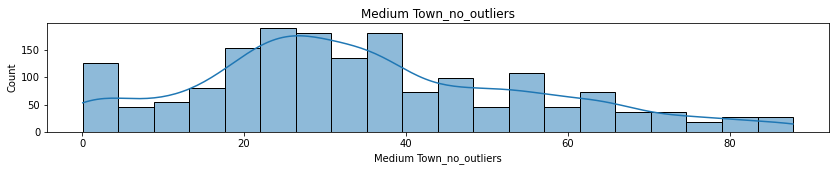

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


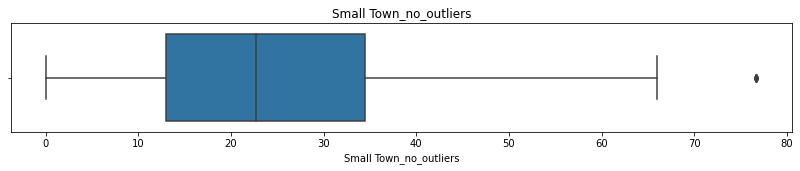

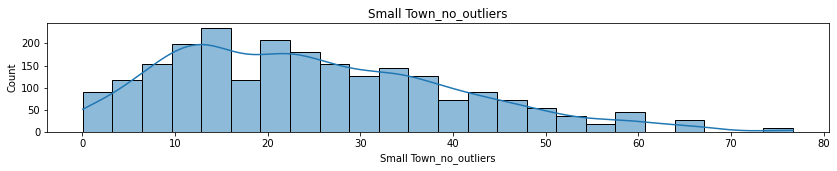

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


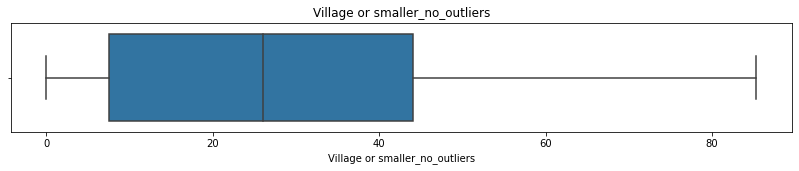

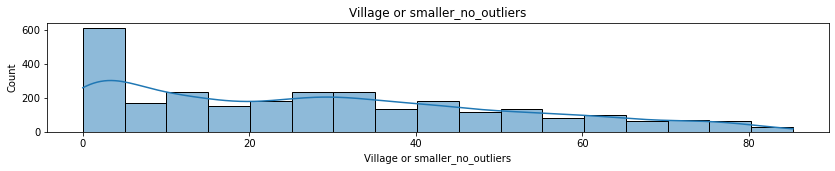

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


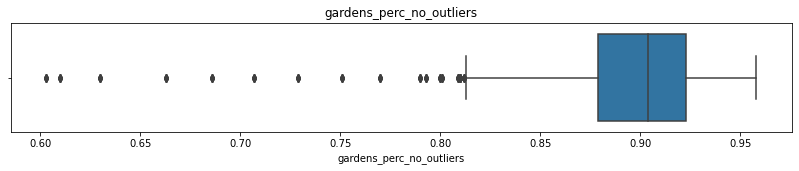

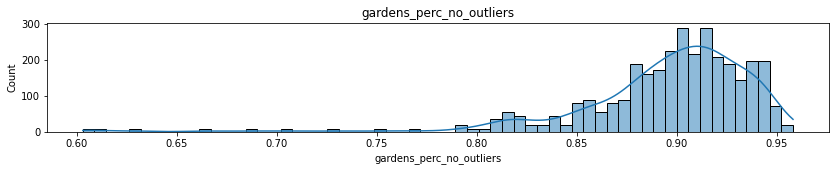

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


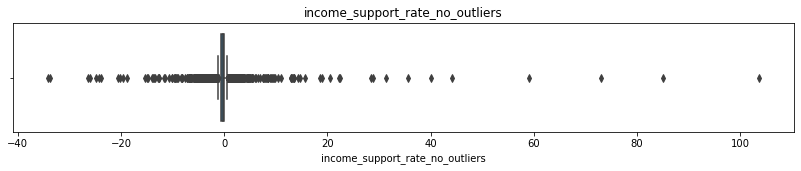

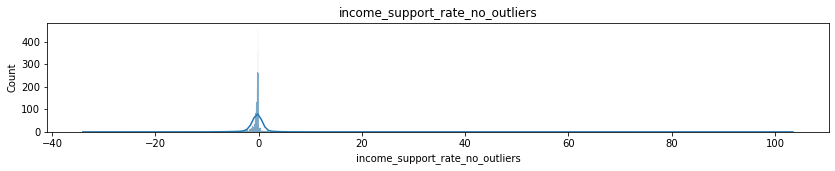

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


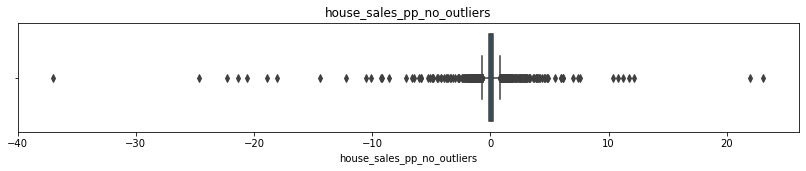

KeyboardInterrupt: 

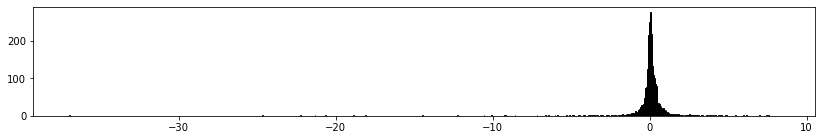

In [9]:
for i in df_no_outs.columns:
    col = df_no_outs[i].dropna()
    
    fig, ax = plt.subplots(figsize=(14, 2))
    sns.boxplot(col)
    ax.set_title(i)
    plt.show()
    
    fig2, ax2 = plt.subplots(figsize=(14, 2))
    sns.histplot(data=col,kde=True)
    ax2.set_title(i)
    plt.show()

In [ ]:
combined_df